In [1]:
import AlGDock.BindingPMF_plots
from AlGDock.BindingPMF_plots import *
import os, shutil, glob

phases = ['NAMD_Gas', 'NAMD_OBC', 'OpenMM_OBC2']
# phases = ['sander_Gas', \
#   'sander_HCT', 'sander_OBC1', 'sander_OBC2', 'sander_GBn', 'sander_GBn2', \
#   'sander_PBSA', 'sander_ALPB_HCT', 'sander_ALPB_OBC1', 'sander_ALPB_OBC2', \
#   'sander_ALPB_GBn', 'gbnsr6_Still', 'gbnsr6_CHA']

self = AlGDock.BindingPMF_plots.BPMF_plots(\
  dir_dock='dock', dir_cool='cool',\
  ligand_database='prmtopcrd/ligand.db', \
  forcefield='prmtopcrd/gaff2.dat', \
  ligand_prmtop='prmtopcrd/ligand.prmtop', \
  ligand_inpcrd='prmtopcrd/ligand.trans.inpcrd', \
  ligand_mol2='prmtopcrd/ligand.mol2', \
  ligand_rb='prmtopcrd/ligand.rb', \
  receptor_database='prmtopcrd/receptor.db', \
  receptor_prmtop='prmtopcrd/receptor.prmtop', \
  receptor_inpcrd='prmtopcrd/receptor.trans.inpcrd', \
  receptor_fixed_atoms='prmtopcrd/receptor.pdb', \
  complex_prmtop='prmtopcrd/complex.prmtop', \
  complex_inpcrd='prmtopcrd/complex.trans.inpcrd', \
  complex_fixed_atoms='prmtopcrd/complex.pdb', \
  score = 'prmtopcrd/xtal_plus_dock6_scored.mol2', \
  temperature_scaling = 'Quadratic', \
  pose = -1, \
  rmsd=True, \
  dir_grid='grids', \
  protocol='Adaptive', cool_therm_speed=25.0, dock_therm_speed=0.25, \
  T_HIGH=450.0, T_SIMMIN=300.0, T_TARGET=300.0, \
  sampler='HMC', \
  MCMC_moves=1, \
  sampling_importance_resampling = True, \
  solvation = 'Full', \
  seeds_per_state=10, steps_per_seed=200, darts_per_seed=0, \
  sweeps_per_cycle=50, snaps_per_cycle=25, attempts_per_sweep=100, \
  steps_per_sweep=50, darts_per_sweep=0, \
  cool_repX_cycles=3, dock_repX_cycles=4, \
  site='Sphere', site_center=[1.7416, 1.7416, 1.7416], \
  site_max_R=1.0, \
  site_density=10., \
  phases=phases, \
  cores=-1, \
  random_seed=-1, \
  max_time=240, \
  keep_intermediate=True)

###########
# AlGDock #
###########
Molecular docking with adaptively scaled alchemical interaction grids

in /Users/dminh/Applications/miniconda2/envs/algdock/lib/python2.7/site-packages/AlGDock/BindingPMF.py
last modified Tue Sep 18 16:21:44 2018
    
using 4/4 available cores
using random number seed of -1
  no progress information for dock

*** Directories ***
  start: /Users/dminh/Installers/AlGDock-0.0.1/Example
  cool: /Users/dminh/Installers/AlGDock-0.0.1/Example/cool
  dock: /Users/dminh/Installers/AlGDock-0.0.1/Example/dock

*** Files ***
previously stored in cool directory:
  prmtop:
    L: prmtopcrd/ligand.prmtop
  ligand_database: prmtopcrd/ligand.db
  forcefield: prmtopcrd/gaff2.dat
  inpcrd:
    L: prmtopcrd/ligand.trans.inpcrd

from arguments and defaults:
  ligand_database: prmtopcrd/ligand.db
  receptor_database: prmtopcrd/receptor.db
  forcefield: prmtopcrd/gaff2.dat
  prmtop:
    L: prmtopcrd/ligand.prmtop
    R: prmtopcrd/receptor.prmtop
    RL: prmtopcrd/complex.p

In [2]:
(confs, Es) = self._get_confs_to_rescore(site=False, \
  minimize=False, sort=False)
if self.params['dock']['pose']<len(confs):
  starting_pose = np.copy(confs[self.params['dock']['pose']])
  self.confs['dock']['starting_poses'] = [np.copy(starting_pose)]
else:
  self._clear('dock')
  self._store_infinite_f_RL()
  raise Exception('Pose index greater than number of poses')

Xo = np.copy(self.universe.configuration().array)
self.universe.setConfiguration(Configuration(self.universe, starting_pose))
import AlGDock.RigidBodies
rb = AlGDock.RigidBodies.identifier(self.universe, self.molecule)
(TorsionRestraintSpecs, ExternalRestraintSpecs) = rb.poseInp()
self.universe.setConfiguration(Configuration(self.universe, Xo))

natoms = self.universe.numberOfAtoms()

In [3]:
TorsionRestraintSpecs

[[23, 5, 3, 14, 0.040296221513288072, 1.5707963267948966],
 [10, 23, 5, 2, 3.0328674648559164, 1.5707963267948966],
 [4, 1, 3, 5, -0.02880111483970503, 1.5707963267948966],
 [0, 2, 5, 23, 3.1273439246183283, 1.5707963267948966],
 [13, 2, 0, 4, 3.133652897921857, 1.5707963267948966],
 [7, 4, 0, 2, -3.1235781070665647, 1.5707963267948966],
 [8, 7, 4, 0, -1.3532151973666977, 1.0471975511965976],
 [20, 8, 7, 4, -1.1958699526956518, 1.0471975511965976],
 [9, 20, 8, 6, 1.0911135463380173, 1.0471975511965976],
 [21, 6, 8, 20, -2.6998047537379768, 1.0471975511965976]]

In [4]:
self._set_universe_evaluator(
   {'k_angular_ext':self.params['dock']['k_pose'], \
    'k_spatial_ext':self.params['dock']['k_pose'], \
    'k_angular_int':self.params['dock']['k_pose'],
    'T':300.})

self.universe.energyTerms()

{'pose dihedral angle': 0.0,
 'pose external angle': 0.0,
 'pose external dihedral': 0.0,
 'pose external distance': 0.0}

In [5]:
BAT = rb.BAT(Xo, extended=True)
print BAT

[ 2.65005     0.33617     1.33521     2.95702342  1.85688265  1.12341911
  0.10854012  0.13899013  2.12802605  0.12733653  2.1178502   0.04029622
  0.13817907  2.04759451 -3.13002911  0.13697354  2.09710169 -0.06179643
  0.10008486  1.88619203  3.03286746  0.13901109  2.12527967 -0.02880111
  0.10874564  2.07642579 -3.1114669   0.13677911  2.12894047  3.12734392
  0.10844533  2.07978315  3.1336529   0.15168174  2.0822348  -3.12357811
  0.10870246  2.09351825 -0.01386223  0.15291334  2.02081245 -1.3532152
  0.10963041  1.87956994  2.1261487   0.10967293  1.93429261  4.11316359
  0.14623753  1.87958116 -1.19586995  0.1511497   1.91997532  4.15565703
  0.10910276  1.93109058  2.09291266  0.10506463  1.93033725  1.09111355
  0.10339448  1.97924038 -4.19900299  0.10402517  1.9896526  -2.07392492
  0.12290462  2.00076437 -2.69980475  0.12644697  2.15425314  3.17066138]


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

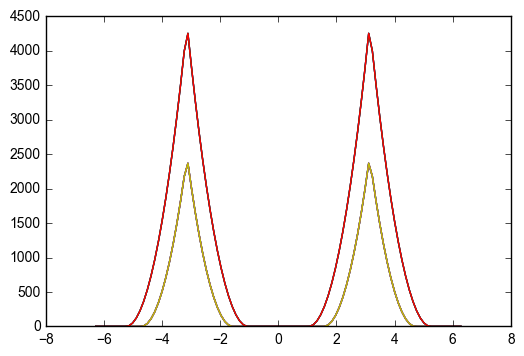

In [7]:
# Check internal torsions

for n in range(len(rb._softTorsionInd)):
  softTorsionInd = rb._softTorsionInd[n]
  BAT_ind = np.array(range(6+5,natoms*3,3))[softTorsionInd]
  Es = []
  for torsion_offset in np.linspace(-2*np.pi,2*np.pi,100):
    BAT_n = [BAT[ind] if ind!=BAT_ind else BAT[ind] + torsion_offset \
      for ind in range(len(BAT))]
    XYZ = rb.Cartesian(BAT_n)
    self.universe.setConfiguration(Configuration(self.universe, XYZ))
    Es.append(self.universe.energy())
    # self.universe.energyAndGradients()
  plt.plot(np.linspace(-2*np.pi,2*np.pi,100), Es)

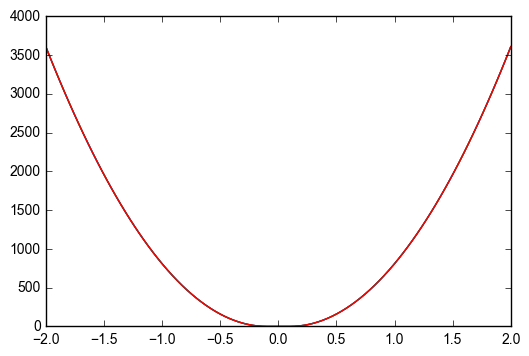

In [8]:
# Check external translations

for n in range(3):
#   print '*'*20
#   print n
#   print '*'*20
  Es = []
  BATs = []
  for spatial_offset in np.linspace(-2.0,2.0,100):
    BAT_n = [BAT[ind] if ind!=n else BAT[ind] + spatial_offset \
      for ind in range(len(BAT))]
    XYZ = rb.Cartesian(BAT_n)
    self.universe.setConfiguration(Configuration(self.universe, XYZ))
    Es.append(self.universe.energy())
    BATs.append(rb.BAT(XYZ, extended=True)[:6])
    # self.universe.energyAndGradients()
    # terms = self.universe.energyTerms()
    # print terms # ['pose external distance'], terms['pose external angle']
  plt.plot(np.linspace(-2.0,2.0,100), Es)
  # print '\n'.join(['\t'.join(['%3.2f'%b for b in BAT_b]) for BAT_b in BATs])

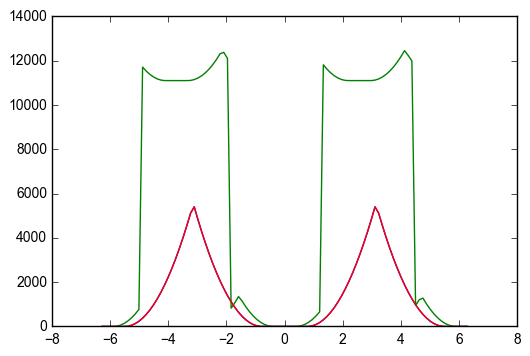

In [11]:
# Check external angles

for n in range(3,6):
  Es = []
  BATs = []
  for angle_offset in np.linspace(-2*np.pi,2*np.pi,100):
    BAT_n = [BAT[ind] if ind!=n else BAT[ind] + angle_offset \
      for ind in range(len(BAT))]
    XYZ = rb.Cartesian(BAT_n)
    self.universe.setConfiguration(Configuration(self.universe, XYZ))
    Es.append(self.universe.energy())
    BATs.append(BAT_n[3:6] + list(rb.BAT(XYZ, extended=True)[3:6]))
    # print self.universe.energyTerms()
    # self.universe.energyAndGradients()
  plt.plot(np.linspace(-2*np.pi,2*np.pi,100), Es)
  # print '\n'.join(['\t'.join(['%3.2f'%b for b in BAT_b]) for BAT_b in BATs])  

In [10]:
# The discontinuities in the potential as a function of theta are due to gimbal lock.